<a href="https://colab.research.google.com/github/ppprakharr/CIFAR10-Object-recognition-system/blob/main/CIFAR_10_Object_recognition_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#dataset api
!kaggle competitions download -c cifar-10


 97% 697M/715M [00:06<00:00, 106MB/s]
100% 715M/715M [00:06<00:00, 115MB/s]


In [5]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [6]:
#extracting the compressed dataset

from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('dataset extracted')

dataset extracted


In [7]:
!ls


cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [8]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.9 MB/s eta 0:00:00


In [9]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [10]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies

In [11]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
filename = os.listdir('/content/train')

In [13]:
print(len(filename))

50000


In [14]:
print(filename[0:5])

['18002.png', '37928.png', '16212.png', '38077.png', '42433.png']


Labels processing

In [15]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [16]:
labels_df.shape

(50000, 2)

In [17]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [19]:
labels_df[labels_df['id']==18002]

,id,label
18001,18002,dog


In [20]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [23]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [24]:
label_dict={'airplane':0, 'automobile' :1, 'bird':2, 'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'truck':9,'ship':8}

In [28]:
labels=[label_dict[i] for i in labels_df['label']]

In [29]:
print(labels[0:5])

[6, 9, 9, 4, 1]


In [31]:
print(labels[-5:])

[2, 6, 9, 1, 1]


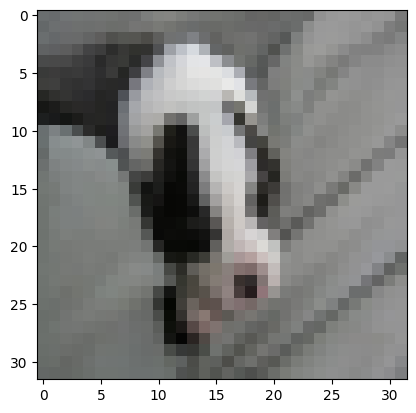

<Figure size 100x100 with 0 Axes>

In [36]:
img = mpimg.imread('/content/train/45888.png')
plt.imshow(img)
# plt.figure(figsize=(1,1))
plt.show()

In [39]:
id_list = list(labels_df['id'])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image** **Processing**

In [40]:
# convert images to numpy array

train_data_folder = '/content/train/'

data=[]
for id in id_list:
  image=Image.open(train_data_folder+ str(id)+'.png')
  image=np.array(image)
  data.append(image)


In [41]:
type(data)

list

In [42]:
len(data)

50000

In [43]:
type(data[0])

numpy.ndarray

In [45]:
data[0].shape

(32, 32, 3)

In [46]:
#converting the images and label to numpy array

x = np.array(data)
y=np.array(labels)

train test split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [48]:
print(x.shape,x_train.shape,x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


scaling the data

In [49]:
x_train_scale = x_train/255
x_test_scale= x_test/255

# **Building the Neural Network**

In [50]:
import tensorflow as tf
from tensorflow import keras


In [52]:
no_of_classes=10
# setting up the layers of the neural network
model = keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(no_of_classes, activation='softmax')])

In [60]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
              metrics=['acc'])

training the neural network



In [61]:
model.fit(x_train_scale,y_train,validation_split=0.1,epochs=15)

Epoch 1/15
1125/1125 [==============================] - 5s 3ms/step - loss: 2.0039 - acc: 0.2601 - val_loss: 1.8889 - val_acc: 0.3038
Epoch 2/15
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8697 - acc: 0.3162 - val_loss: 1.8465 - val_acc: 0.3273
Epoch 3/15
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8275 - acc: 0.3389 - val_loss: 1.7810 - val_acc: 0.3595
Epoch 4/15
1125/1125 [==============================] - 5s 5ms/step - loss: 1.7975 - acc: 0.3518 - val_loss: 1.7640 - val_acc: 0.3668
Epoch 5/15
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7828 - acc: 0.3582 - val_loss: 1.7783 - val_acc: 0.3595
Epoch 6/15
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7656 - acc: 0.3704 - val_loss: 1.7647 - val_acc: 0.3690
Epoch 7/15
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7581 - acc: 0.3689 - val_loss: 1.7412 - val_acc: 0.3810
Epoch 8/15
1125/1125 [==============================] - 4s 3ms

# **ResNet50**

In [63]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [65]:
convolutional_base = ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))
convolutional_base.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x78fb802f5cf0>>

In [68]:
no_of_classes=10
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(no_of_classes, activation='softmax'))

In [70]:
model.compile(optimizer = optimizers.RMSprop(learning_rate=2e-5),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history=model.fit(x_train_scale,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 446s 396ms/step - loss: 1.5022 - acc: 0.5021 - val_loss: 0.7565 - val_acc: 0.7890
Epoch 2/10
1125/1125 [==============================] - 442s 393ms/step - loss: 0.9522 - acc: 0.7232 - val_loss: 0.4225 - val_acc: 0.8972
Epoch 3/10
1125/1125 [==============================] - 442s 393ms/step - loss: 0.6965 - acc: 0.8224 - val_loss: 0.3455 - val_acc: 0.9175
Epoch 4/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.5367 - acc: 0.8775 - val_loss: 0.2835 - val_acc: 0.9333
Epoch 5/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.4287 - acc: 0.9112 - val_loss: 0.2640 - val_acc: 0.9350
Epoch 6/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.3336 - acc: 0.9381 - val_loss: 0.2350 - val_acc: 0.9360
Epoch 7/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.2669 - acc: 0.9554 - val_loss: 0.2244 - val_acc: 0.9390
Epoch 8/10
1125/1125 [============

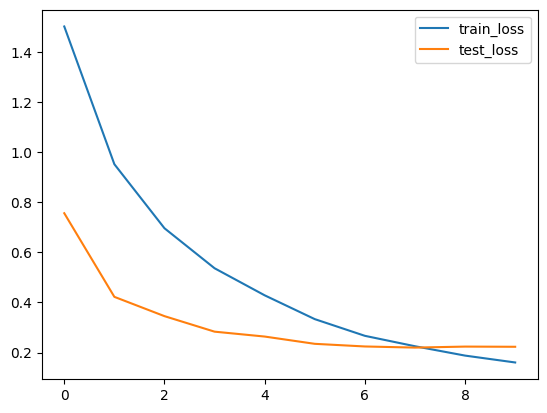

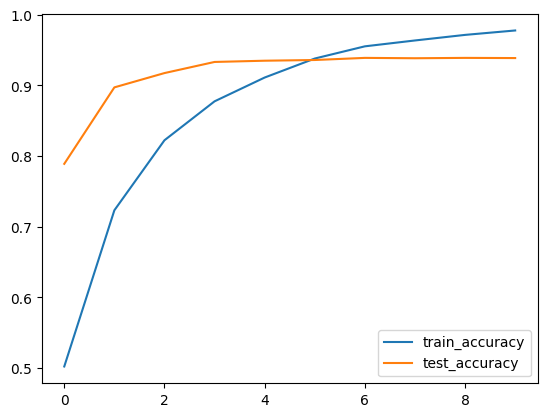

In [76]:
h= history

#plot the loss rate
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='test_loss')
plt.legend()
plt.show()

# showing the accuracy rate
plt.plot(h.history['acc'],label='train_accuracy')
plt.plot(h.history['val_acc'],label='test_accuracy')
plt.legend()
plt.show()